In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [2]:
#file_name = "data_google_active_reset.npz"
file_name = "data_qm_active_reset.npz"
#file_name = "data_qm_apt.npz"

In [3]:
with np.load(file_name) as data:
    rounds_vec = data['rounds_vec']
    trace_distance_matrix = data['trace_distance_matrix']
    success_sigma_matrix = data['success_sigma_matrix']

In [4]:
distance_vec = [3, 5]
encoded_state = "1"

In [5]:
def p_error(n, e):
    return 0.5*(1.0 - (1.0 - 2.0*e)**n)    

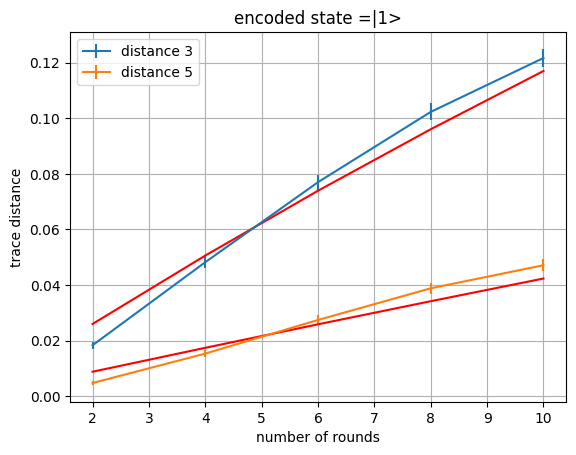

In [6]:
e_logical = []
plt.figure()
for i in range(2):
    popt, pcov = curve_fit(p_error, rounds_vec, trace_distance_matrix[i],
                           sigma=success_sigma_matrix[i], bounds=(0.0, 1.0))

    plt.errorbar(rounds_vec, trace_distance_matrix[i], yerr=success_sigma_matrix[i],
                label=f"distance {distance_vec[i]}")
    plt.plot(rounds_vec, p_error(rounds_vec, *popt), 'r-')
    e_logical.append(popt[0])
plt.title(f'encoded state =|{encoded_state}>')
plt.xlabel('number of rounds')
plt.ylabel('trace distance')
plt.legend()
plt.grid('all')
plt.savefig(file_name + ".png")
plt.show()

In [7]:
e_logical[0]/e_logical[1]

0.9912069340675356

In [8]:
e_logical

[0.9868438217070913, 0.9955981821651109]